# Traitement

In [2]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
from PIL import Image
import math
from rasterio.plot import show
import rasterio



# <ins style='background :lightblue'>ETAPE 1:: Rehaussement de contours </ins> 

## <span style='background :lightgreen'>1-appliquation des filtres sur l’image satellitaire. ( Sobel et LOG )</span>

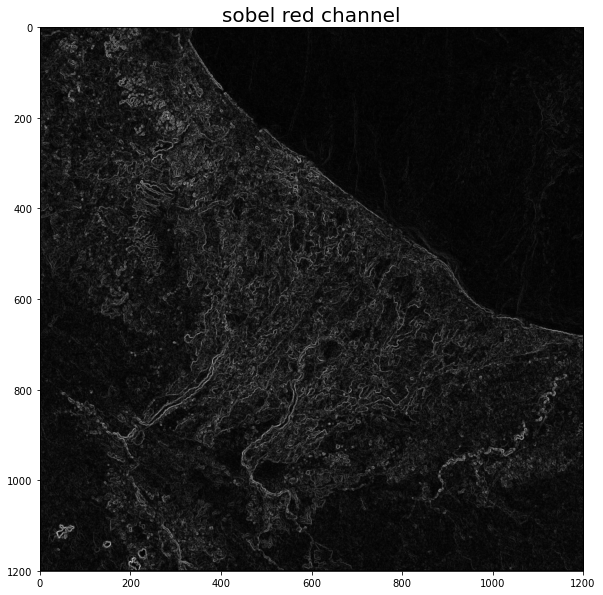

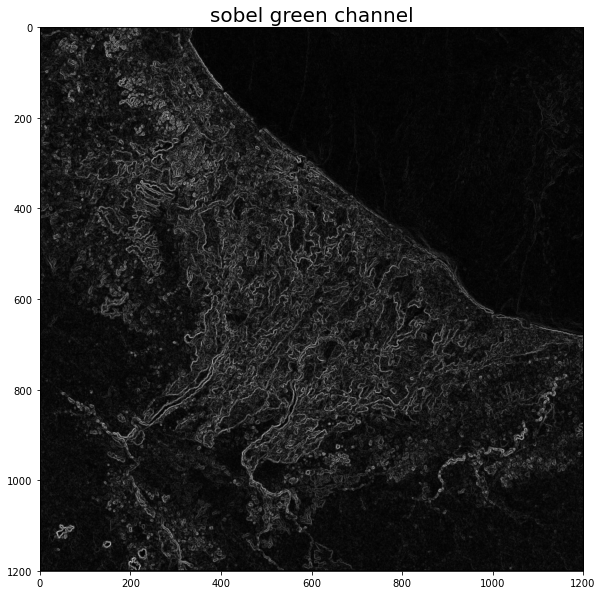

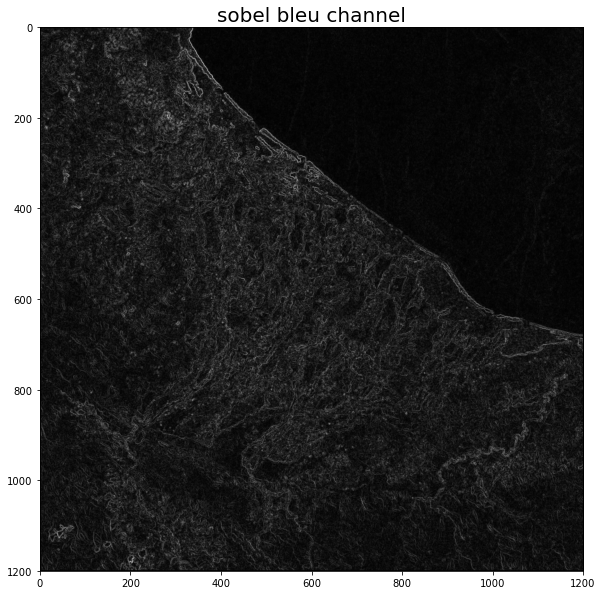

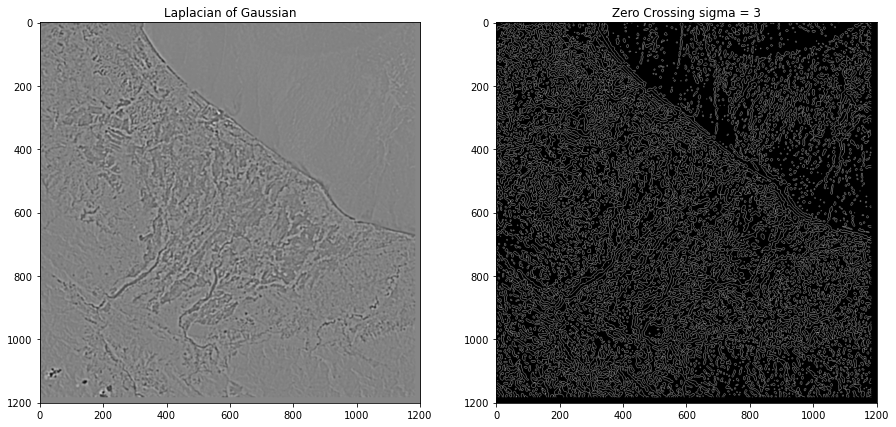

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('imsat TP3.jpg')).astype(np.uint8)

# Sobel Operator
h, w, d = img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
B = newgradientImage[:,:,0] 
G= newgradientImage[:,:,1] 
R=newgradientImage[:,:,2]


fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('sobel red channel',fontsize=20)
plt.imshow(R ,cmap='gray')
fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('sobel green channel',fontsize=20)
plt.imshow(G ,cmap='gray')
fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('sobel bleu channel',fontsize=20)
plt.imshow(B , cmap='gray')



def LOG(img, sigma):
    """
            finds the edges using MarrHildreth edge detection method...
            :param im : input image
            :param sigma : sigma is the std-deviation and refers to the spread of gaussian
            :return:
            a binary edge image...
    """
    size = int(2*(np.ceil(3*sigma))+1)
   #Renvoie les matrices de coordonnées à partir des vecteurs de coordonnées.
    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
        np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)

    # applying filter
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i, j] = np.sum(window)

    log = log.astype(np.int64, copy=False)

    zero_crossing = np.zeros_like(log)

    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 255

    # plotting images
    fig = plt.figure(figsize=(15, 8))
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(log, cmap='gray')
    a.set_title('Laplacian of Gaussian')
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(zero_crossing, cmap='gray')
    string = 'Zero Crossing sigma = '
    string += (str(sigma))
    a.set_title(string)
    plt.show()

    return log, zero_crossing



##affichage filtre LOG
img = cv2.cvtColor(cv2.imread("imsat TP3.jpg"), cv2.COLOR_BGR2GRAY)

log, zero_crossing = LOG(img, 3)



## <span style='background :lightgreen'>2- Pour les filtres du premier ordre, créer les fonctions pour calculer l'amplitude du gradient et la direction du gradient. </span>

Text(0.5, 1.0, 'Direction du gradient -RVB')

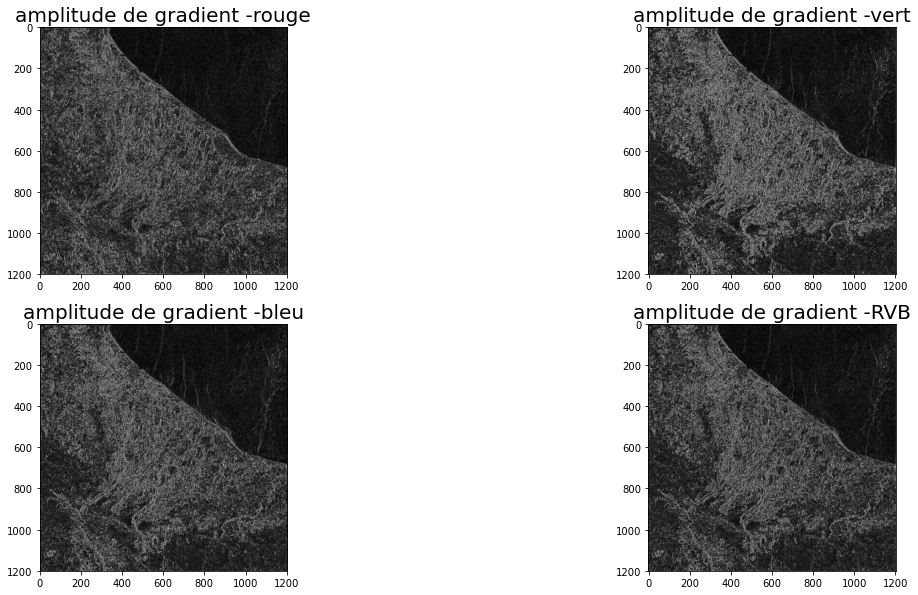

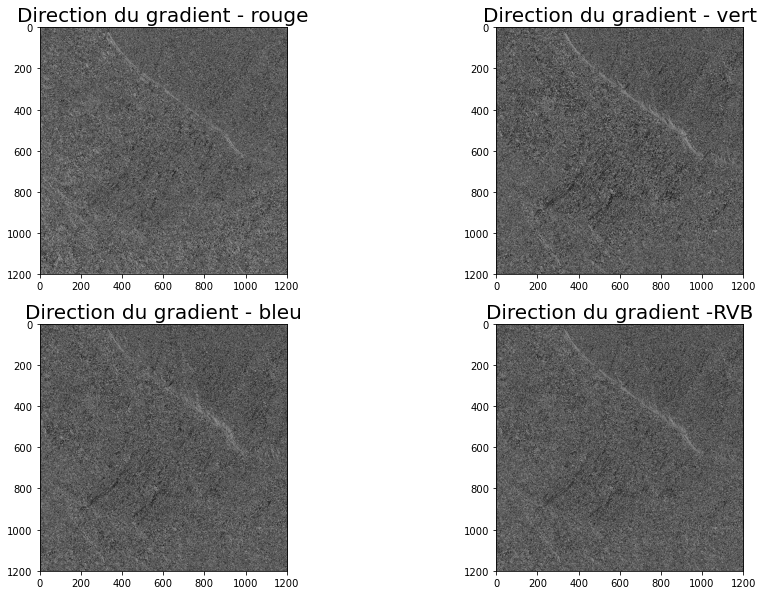

In [40]:
import rasterio
from rasterio.plot import show
def Amplitude(img):
    mag = np.copy(img)
    size = mag.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            #container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
            mag[i][j] = np.sqrt((gx ** 2) + (gx ** 2))
    return mag
    pass


def Direction(img):
    direction = np.copy(img)
    size = direction.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            direction[i][j] = np.arctan2(gy, gx) * (180 / np.pi) % 180
    return direction
    pass




img = rasterio.open('imsat TP3.jpg')
#Lire les valeurs de la grille dans des tableaux numpy 3 canaux
red = img.read(1) #lire couleur rouge de limage
green = img.read(2) #lire couleur vert
bleu = img.read(3) #lire couleur bleu


#affichage filtre sobel
imgR = Amplitude(red)
imgG = Amplitude(green)
imgB = Amplitude(bleu)
img1 = cv2.cvtColor(cv2.imread("imsat TP3.jpg"), cv2.COLOR_BGR2GRAY)
imgS = Amplitude(img1)
imgS = cv2.cvtColor(imgS, cv2.COLOR_GRAY2RGB)
f, axs = plt.subplots(2,2,figsize=(20, 10))
axs[0,0].imshow(imgR, cmap='gray')
axs[0,0].set_title('amplitude de gradient -rouge',fontsize=20)
axs[0,1].imshow(imgG, cmap='gray')
axs[0,1].set_title('amplitude de gradient -vert',fontsize=20)
axs[1,0].imshow(imgB, cmap='gray' )
axs[1,0].set_title('amplitude de gradient -bleu',fontsize=20)
axs[1,1].imshow(imgS )
axs[1,1].set_title('amplitude de gradient -RVB',fontsize=20)

#affichage filtre sobel
imgRR = Direction(red)
imgGG = Direction(green)
imgBB = Direction(bleu)

fig, axs = plt.subplots(2,2,figsize=(15, 10))
axs[0,0].imshow(imgRR, cmap='gray')
axs[0,0].set_title('Direction du gradient - rouge',fontsize=20)
axs[0,1].imshow(imgGG, cmap='gray')
axs[0,1].set_title('Direction du gradient - vert',fontsize=20)
axs[1,0].imshow(imgBB, cmap='gray')
axs[1,0].set_title('Direction du gradient - bleu',fontsize=20)



## <span style='background :lightpink'> Observation : </span>

- on observe que les filtres du premier ordre avec SOBEL , on voit plus de contour et de details (les lignes peuvent être identifiées par des pixels qui ont une valeur élevée (sont blancs). 
- on peut voir que chaque ligne est d'un côté sombre et de l'autre blanche. Basé sur la deuxième dérivée, il est très sensible au bruit
- l'orientation comme l'angle d'une flèche pointant de la partie sombre de l'image vers la partie lumineuse de l'image
- le blanc signifie un changement important dans l'image initiale tandis que le noir signifie aucun changement

# <ins style='background:lightblue'>Etape 2 :: Segmentation </ins>
## <span style='background :lightgreen'>1-Segmentation sur seuillage </span>
-l’histogramme des niveaux de gris est utilisé afin d’en déduire le seuil.pour chaque canal de l'image ( RGB)
-La valeur médiane entre le maximum et leminimum (pour chaque pic) , ensuite le sueillage sera fais apres parcours de chaque pixels



   

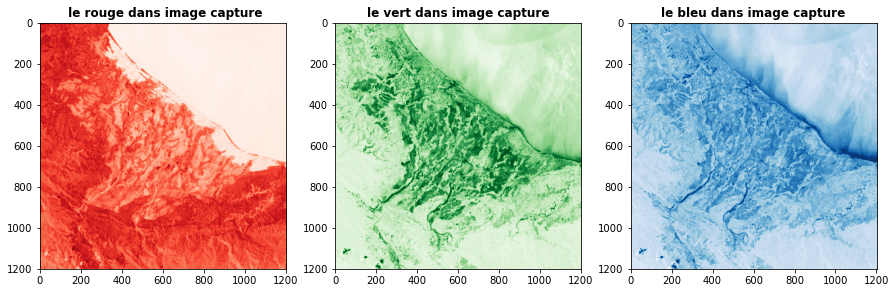

In [171]:

#Lire une image en niveaux de gris
img = rasterio.open('imsat TP3.jpg')
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(15,7))
#faire voir la couleur rouge
show((img , 1), ax=axr, cmap='Reds', title=' le rouge dans image capture')
#faire ressortir la couleur verte
show((img, 2), ax=axg, cmap='Greens', title='le vert dans image capture')
#faire voir la couleur bleu
show((img ,3), ax=axb, cmap='Blues', title='le bleu dans image capture')

### <span style='background :lightgreen'> EXTRACTION DE CANNAUX RGB DE L4IMAGE ORIGINALE </span>

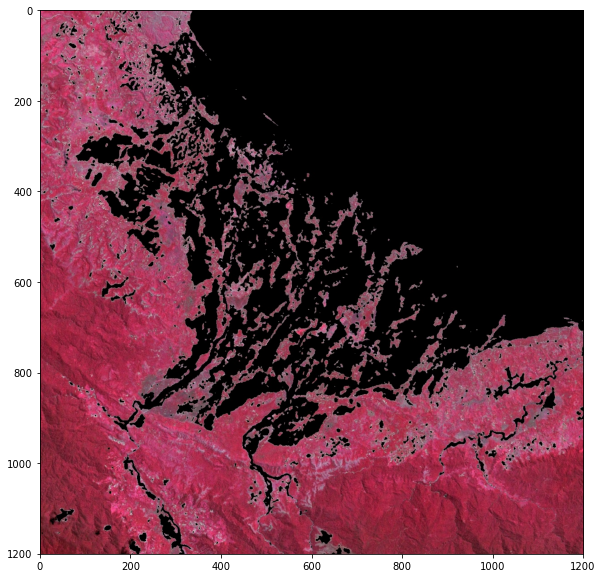

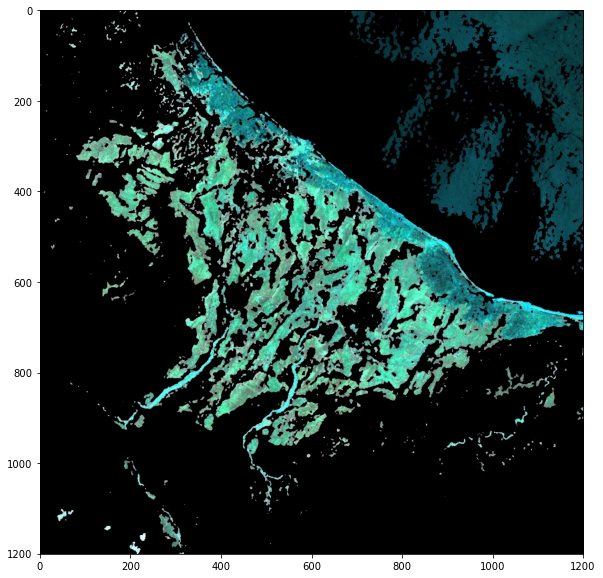

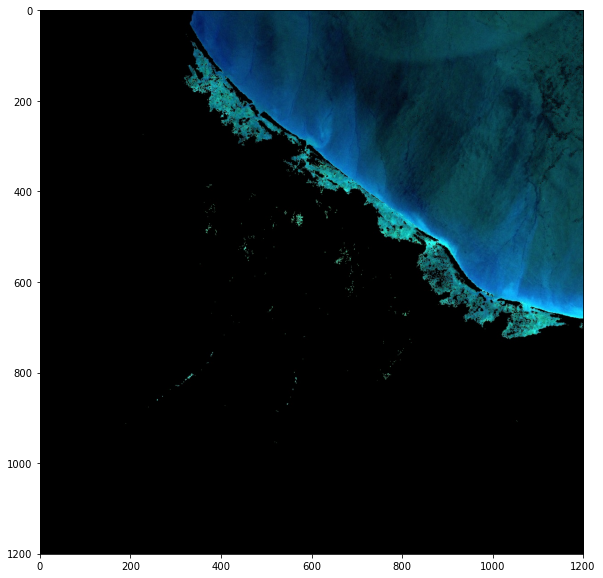

In [168]:
import numpy as np
import cv2

image = cv2.imread('imsat TP3.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([155,25,0])
upper_red = np.array([179,255,255])

lower_green= np.array([36,  0,  0])
upper_green = np.array([ 95 ,255, 255])

lower_bleu= np.array([80,190,0])
upper_bleu= np.array([140,255,255])

mask = cv2.inRange(image, lower_red, upper_red)
result = cv2.bitwise_and(image, image, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
cv2.imwrite("img_red.jpg", result) 

mask = cv2.inRange(image, lower_green, upper_green)
result = cv2.bitwise_and(image, image, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
cv2.imwrite("img_green.jpg", result) 

mask = cv2.inRange(image, lower_bleu, upper_bleu)
result = cv2.bitwise_and(image, image, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
cv2.imwrite("img_bleu.jpg", result) 

red_channel=cv2.imread('img_red.jpg')
fig, axs = plt.subplots(figsize=(15, 10))
plt.imshow(cv2.cvtColor(red_channel, cv2.COLOR_BGR2RGB))
plt.show()

green_channel=cv2.imread('img_green.jpg')
fig, axs = plt.subplots(figsize=(15, 10))
plt.imshow(cv2.cvtColor(green_channel, cv2.COLOR_BGR2RGB))
plt.show()

blue_channel=cv2.imread('img_bleu.jpg')
fig, axs = plt.subplots(figsize=(15, 10))
plt.imshow(cv2.cvtColor(blue_channel, cv2.COLOR_BGR2RGB))
plt.show()



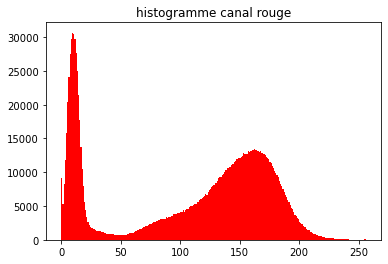

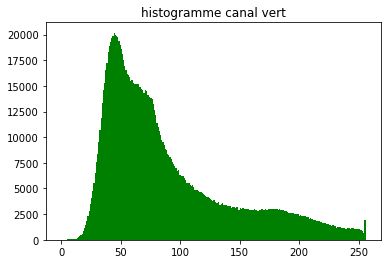

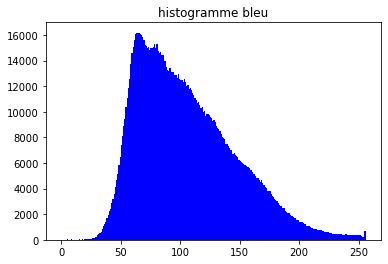

(0.0, 1.0, 0.0, 1.0)

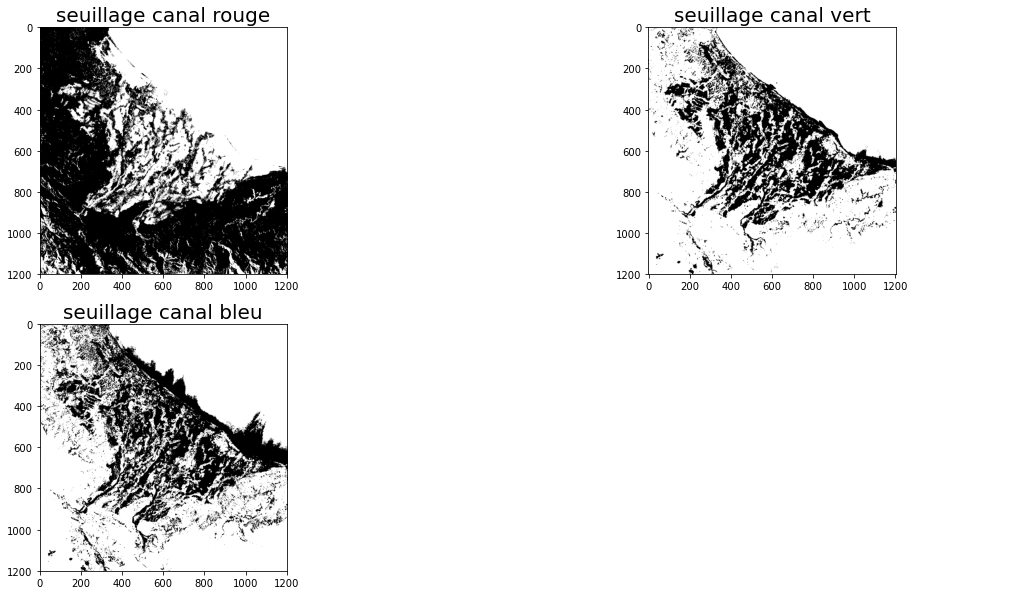

In [172]:
#Lire les valeurs de la grille dans des tableaux numpy 3 canaux
red = img.read(1) #lire couleur rouge de limage 2
green = img.read(2) #lire couleur vert4
bleu = img.read(5) #lire couleur bleu 5



# Histogram method
def hist(img , title ,A):
    plt.hist(img.ravel(), 256, [0, 256],color = A)
    plt.title(title)
    plt.show()

    
def count_dist_peaks(series, bins, prominence, width):
    count, division = np.histogram(series, bins=bins)
    peaks, props = find_peaks(count, prominence=prominence, width=width)
    return peaks

hist(red, "histogramme canal rouge", "red")
hist(green, "histogramme canal vert", "green")
hist(bleu, "histogramme bleu", "blue")



# Find max and min value
maximumR = np.max(red)
maximumG = np.max(green)
maximumB = np.max(bleu)
minimumR = np.min(red)
minimumG = np.min(green)
minimumB = np.min(bleu)
MAX = max(maximumR, maximumG , maximumB)
MIN = min(minimumR, minimumG, minimumB)

# Collecting array
arr = np.zeros(red.shape, dtype='uint8')
#hist(arr, "pique", "red")


#seuillage canal rouge
# Find average value
averageValue = (maximumG-minimumG) / 2
Result = []
# Read Image
img = cv2.imread('img_red.jpg', 0)
# Change image to gray scale
img = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2GRAY)
for i in range(red.shape[0]):
    for j in range(red.shape[1]):
        if (red[i][j] <= averageValue):
            red[i][j] = 255
        else:
            red[i][j] = 0
            

            


#seuillage canal green
# Find average value
averageValue1 = (maximumG-minimumG) / 2
Result = []

for i in range(green.shape[0]):
    for j in range(green.shape[1]):
        if (green[i][j] <= averageValue1):
            green[i][j] = 255
        else:
            green[i][j] = 0
            



#seuillage canal bleu
# Find average value
averageValue2 = (maximumB-minimumB) / 2
Result = []
# Read Image

for i in range(bleu.shape[0]):
    for j in range(bleu.shape[1]):
        if (bleu[i][j] <= averageValue2):
            bleu[i][j] = 255
        else:
            bleu[i][j] = 0
            

# The thresholded image
f, ax = plt.subplots(2,2,figsize=(20, 10))

ax[0,0].imshow(red,cmap='gray')
ax[0,0].set_title('seuillage canal rouge',fontsize=20)
ax[0,1].imshow(green,cmap='gray')
ax[0,1].set_title('seuillage canal vert',fontsize=20)

ax[1,0].imshow(bleu,cmap='gray')
ax[1,0].set_title('seuillage canal bleu',fontsize=20)


ax[1,1].axis("off")


## <span style='background :lightgreen'>2-Explications : </span>
## -seuillage adaptive-
- l'algorithme calcule le seuil pour une petite région de l'image. Nous obtenons donc des seuils différents pour différentes régions de la même image et cela nous donne de meilleurs résultats pour les images avec un éclairage variable.
- pour trouver le seuil local consiste à examiner statistiquement les valeurs d'intensité du voisinage local de chaque pixel. La statistique la plus appropriée dépend en grande partie de l'image d'entrée. Les fonctions simples et rapides incluent la moyenne de la distribution locale d'intensité,
- la methode trouve  une valeur seuil "local"  entre les pics en calculant la moyenne entre deux pics significative le  plus grand et le plus petit , ensuite une comparaison est faire pour la prise binaire , les pixels au dessus de la valeur de seuil seront activé donc = 255 , sinon ils seront désactivés donc = 0.
- l'histogramme en niveau de gris de cette image  a des pics significatives  , 
* limitation : </span>
les méthodes adaptatives ont tendance à se concentrer uniquement sur les configurations locales, le résultat binaire n'est donc pas optimisé.


# <ins style='background :lightblue'>Etape 3 :: Classification (K-Means Clustering.) 3 cannal RGB </ins>
voici la procedure :
- le choix de nombre de clusters que je souhaite  trouver, soit k.( 3)
- j'ai attribué  aléatoirement les points de données à l'un des k clusters.
- jai calculé ensuite le centre des clusters.
- Calcul de distance entre les points de données et les centres de chacun des clusters.
- En fonction de la distance entre chaque point de données et le cluster, réaffectez les points de données aux clusters les plus proches.
- Calcul à nouveau le nouveau centre de cluster.Répétez les étapes  5 jusqu'à ce que les points de données ne modifient pas les clusters .

##  <ins style='background :red'>Kmeans clustering canal rouge</ins>

(1442401, 3)


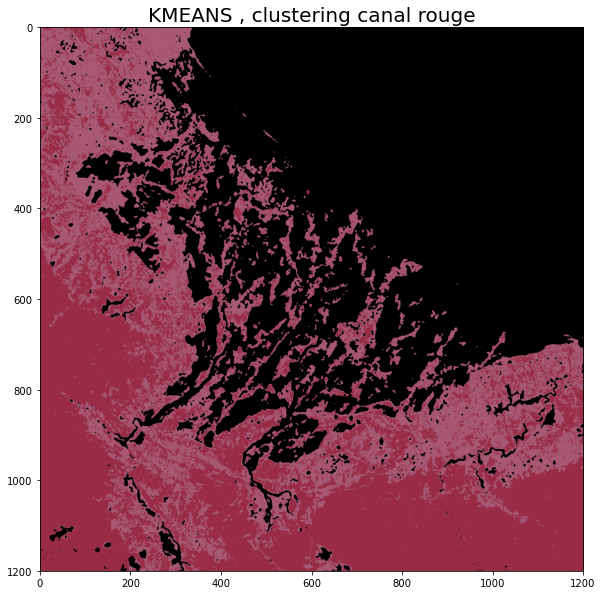

In [192]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K
        ##nous allons nous arrêter soit lorsqu'un certain nombre d'itérations dépasse (disons 100), 
        #critéré d'arret
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        #fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
        #nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
       

        #il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
        #bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

image = cv2.imread("img_red.jpg")
## convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# remodeler l'image en un tableau 2D de pixels et 3 valeurs de couleur (RVB)
pixel_values = image.reshape((-1, 3))
## convertir en float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

#fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
#nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
# number of clusters (K)

#il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
#bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
k = KMeans(K=3, max_iters=100)  
y_pred = k.predict(pixel_values) 
k.cent()

## reconvertir en valeurs 8 bits
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

# flatten the labels array
labels = y_pred.flatten()

# convertir tous les pixels à la couleur des centres de gravité
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('KMEANS , clustering canal rouge',fontsize=20)
plt.imshow(segmented_image)
plt.show()

##  <ins style='background :green'>Kmeans clustering canal vert</ins>

(1442401, 3)


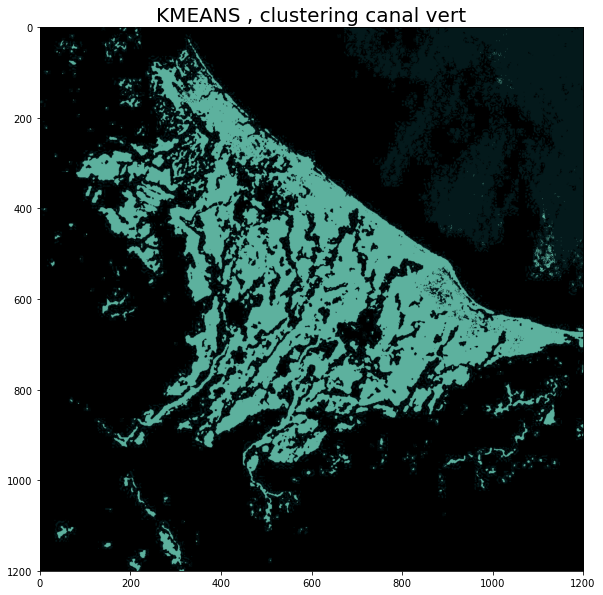

In [11]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=6, max_iters=100, plot_steps=False):
        self.K = K
        ##nous allons nous arrêter soit lorsqu'un certain nombre d'itérations dépasse (disons 100), 
        #critéré d'arret
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        #fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
        #nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
       

        #il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
        #bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

image = cv2.imread("img_green.jpg")
## convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# remodeler l'image en un tableau 2D de pixels et 3 valeurs de couleur (RVB)
pixel_values = image.reshape((-1, 3))
## convertir en float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

#fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
#nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
# number of clusters (K)

#il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
#bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
k = KMeans(K=6, max_iters=1)  
y_pred = k.predict(pixel_values) 
k.cent()

## reconvertir en valeurs 8 bits
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

# flatten the labels array
labels = y_pred.flatten()

# convertir tous les pixels à la couleur des centres de gravité
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('KMEANS , clustering canal vert',fontsize=20)
plt.imshow(segmented_image)
plt.show()

##  <ins style='background :blue'>Kmeans clustering canal bleu</ins>

(1442401, 3)


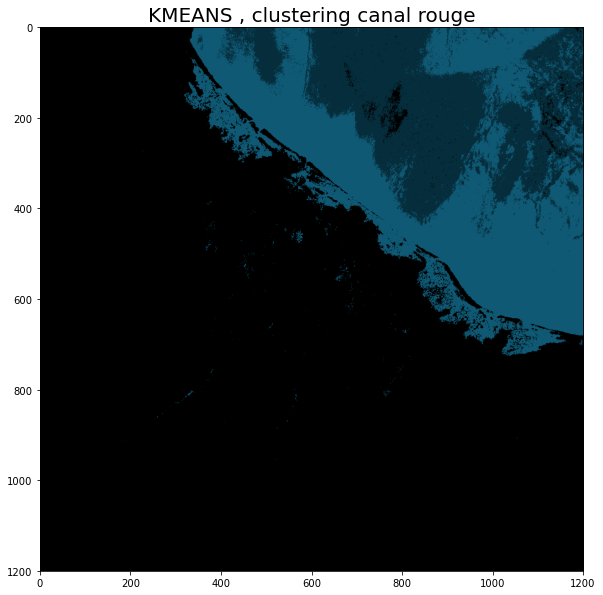

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=6, max_iters=100, plot_steps=False):
        self.K = K
        ##nous allons nous arrêter soit lorsqu'un certain nombre d'itérations dépasse (disons 100), 
        #critéré d'arret
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        #fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
        #nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
       

        #il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
        #bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

image = cv2.imread("img_bleu.jpg")
## convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# remodeler l'image en un tableau 2D de pixels et 3 valeurs de couleur (RVB)
pixel_values = image.reshape((-1, 3))
## convertir en float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

#fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
#nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
# number of clusters (K)

#il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
#bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
k = KMeans(K=6, max_iters=1)  
y_pred = k.predict(pixel_values) 
k.cent()

## reconvertir en valeurs 8 bits
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

# flatten the labels array
labels = y_pred.flatten()

# convertir tous les pixels à la couleur des centres de gravité
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('KMEANS , clustering canal rouge',fontsize=20)
plt.imshow(segmented_image)
plt.show()

# <ins style='background :lightblue'> Classification (K-Means Clustering.) : image satellitaires </ins>


(1442401, 3)


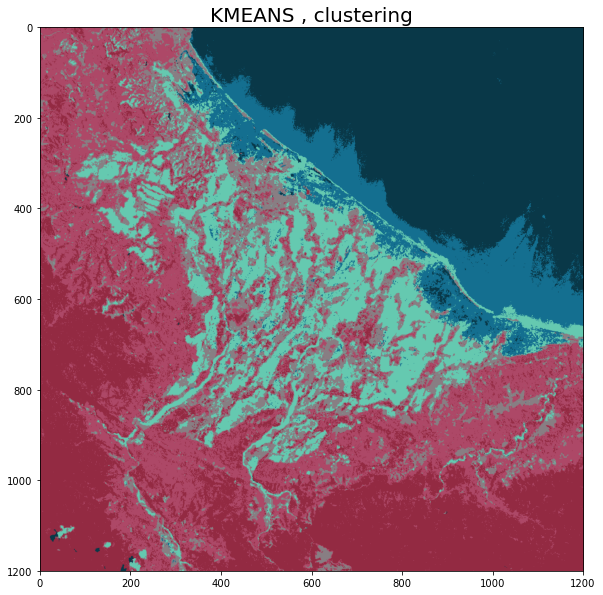

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, K=6, max_iters=100, plot_steps=False):
        self.K = K
        ##nous allons nous arrêter soit lorsqu'un certain nombre d'itérations dépasse (disons 1), 
        #critéré d'arret
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        #fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
        #nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
       

        #il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
        #bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

image = cv2.imread("imsat TP3.jpg")
## convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# remodeler l'image en un tableau 2D de pixels et 3 valeurs de couleur (RVB)
pixel_values = image.reshape((-1, 3))
## convertir en float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

#fonction qui prend un tableau 2D en entrée, et comme notre image d'origine est en 3D (largeur, hauteur et profondeur de 3 valeurs RVB),
#nous devons aplatir la hauteur et la largeur en un seul vecteur de pixels (3 valeurs RVB):
# number of clusters (K)

#il y a trois couleurs principales (vert pour les arbres, bleu pour la mer / 
#bleu vert pour les zones urbaines et non végétales. En conséquence, nous allons utiliser trois clusters pour cette image:
k = KMeans(K=6, max_iters=100)  
y_pred = k.predict(pixel_values) 
k.cent()

## reconvertir en valeurs 8 bits
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

# flatten the labels array
labels = y_pred.flatten()

# convertir tous les pixels à la couleur des centres de gravité
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('KMEANS , clustering',fontsize=20)
plt.imshow(segmented_image)
plt.show()